In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import missingno as msno
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_predict, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.svm import SVC
import tensorflow as tf
import optuna
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import gradio as gr
import os
import joblib
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

2024-05-20 15:46:53.346391: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### ANALYSIS

In [2]:
df = pd.read_excel('/Users/vincenzocamerlengo/Desktop/Machine Learning/TS LUISS data/luiss_data_anonym.xlsx')

In [3]:
df.head()

,Unnamed: 0,A,Ateco,B,C,DataDoc,D,E,F,G,H,Tdoc,VA,CE,DescrizioneRiga,Importo,Iva,Conto,ContoStd,IvaM,Comp,Iva11,TM,%Forf,Art1,Valore1,Nomenclatura,Ritac,RF,%RIT1,%RIT2,CoDitta,RifNormativo,CMar,CTra,Rev,CVia,Rifamm,X,Art2,Valore2,Art3,Valore3,TIva,Caus
0,1,7,476220,N,NaN,2022-08-09,I,NaN,NaN,NaN,NaN,TD04,A,NaN,MISSIONE INVALSI 5 MATEMATICA,3.22,N2.2,6625510,6625005,374.0,NaN,9.0,7,NaN,EAN,9788873343202,NaN,NaN,NaN,0.0,0.0,533,N.I.art.74c.1-2,N,S,NaN,N,NaN,N,NaN,NaN,NaN,NaN,12,12
1,2,7,476220,N,NaN,2022-08-09,I,NaN,NaN,NaN,NaN,TD04,A,NaN,VIAGGIO VACANZE 5,6.20,N2.2,6625510,6625005,374.0,NaN,9.0,7,NaN,EAN,9788842617013,NaN,NaN,NaN,0.0,0.0,533,N.I.art.74c.1-2,N,S,NaN,N,NaN,N,NaN,NaN,NaN,NaN,12,12
2,3,7,476220,N,NaN,2022-08-09,I,NaN,NaN,NaN,NaN,TD04,A,NaN,FINALMENTE IN SECONDARIA! 5,21.06,N2.2,6625510,6625005,374.0,NaN,9.0,7,NaN,EAN,9788847238299,NaN,NaN,NaN,0.0,0.0,533,N.I.art.74c.1-2,N,S,NaN,N,NaN,N,NaN,NaN,NaN,NaN,12,12
3,4,7,476220,N,NaN,2022-08-09,I,NaN,NaN,NaN,NaN,TD04,A,NaN,IN VACANZA CON PEPITO 3,9.50,N2.2,6625510,6625005,374.0,NaN,9.0,7,NaN,EAN,9788876275432,NaN,NaN,NaN,0.0,0.0,533,N.I.art.74c.1-2,N,S,NaN,N,NaN,N,NaN,NaN,NaN,NaN,12,12
4,5,7,476220,N,NaN,2022-08-09,I,NaN,NaN,NaN,NaN,TD04,A,NaN,TEORIA DELL'ISTITUZIONE E DELLA FONDAZIO,11.38,N2.2,6625510,6625005,374.0,NaN,9.0,7,NaN,EAN,9788822903631,NaN,NaN,NaN,0.0,0.0,533,N.I.art.74c.1-2,N,S,NaN,N,NaN,N,NaN,NaN,NaN,NaN,12,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134437 entries, 0 to 134436
Data columns (total 45 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Unnamed: 0       134437 non-null  int64         
 1   A                134437 non-null  object        
 2   Ateco            134437 non-null  int64         
 3   B                134383 non-null  object        
 4   C                8757 non-null    float64       
 5   DataDoc          134437 non-null  datetime64[ns]
 6   D                134436 non-null  object        
 7   E                1795 non-null    object        
 8   F                1795 non-null    object        
 9   G                19 non-null      object        
 10  H                19 non-null      object        
 11  Tdoc             134437 non-null  object        
 12  VA               134437 non-null  object        
 13  CE               2091 non-null    object        
 14  DescrizioneRiga  133

In [5]:
df.shape

(134437, 45)

In [6]:
df.isnull().sum()

Unnamed: 0              0
A                       0
Ateco                   0
B                      54
C                  125680
DataDoc                 0
D                       1
E                  132642
F                  132642
G                  134418
H                  134418
Tdoc                    0
VA                      0
CE                 132346
DescrizioneRiga       905
Importo                 0
Iva                     0
Conto                   0
ContoStd                0
IvaM                  471
Comp               134437
Iva11              100624
TM                      0
%Forf              134402
Art1                   48
Valore1                75
Nomenclatura       134416
Ritac              133706
RF                  79149
%RIT1                   0
%RIT2                   0
CoDitta                 0
RifNormativo        71485
CMar                  403
CTra                   84
Rev                  1657
CVia                    0
Rifamm             132846
X           

IN THE FOLLOWING GRAPH IS SHOWED THE MATRIX OF MISSING VALUES

<Figure size 1000x800 with 0 Axes>

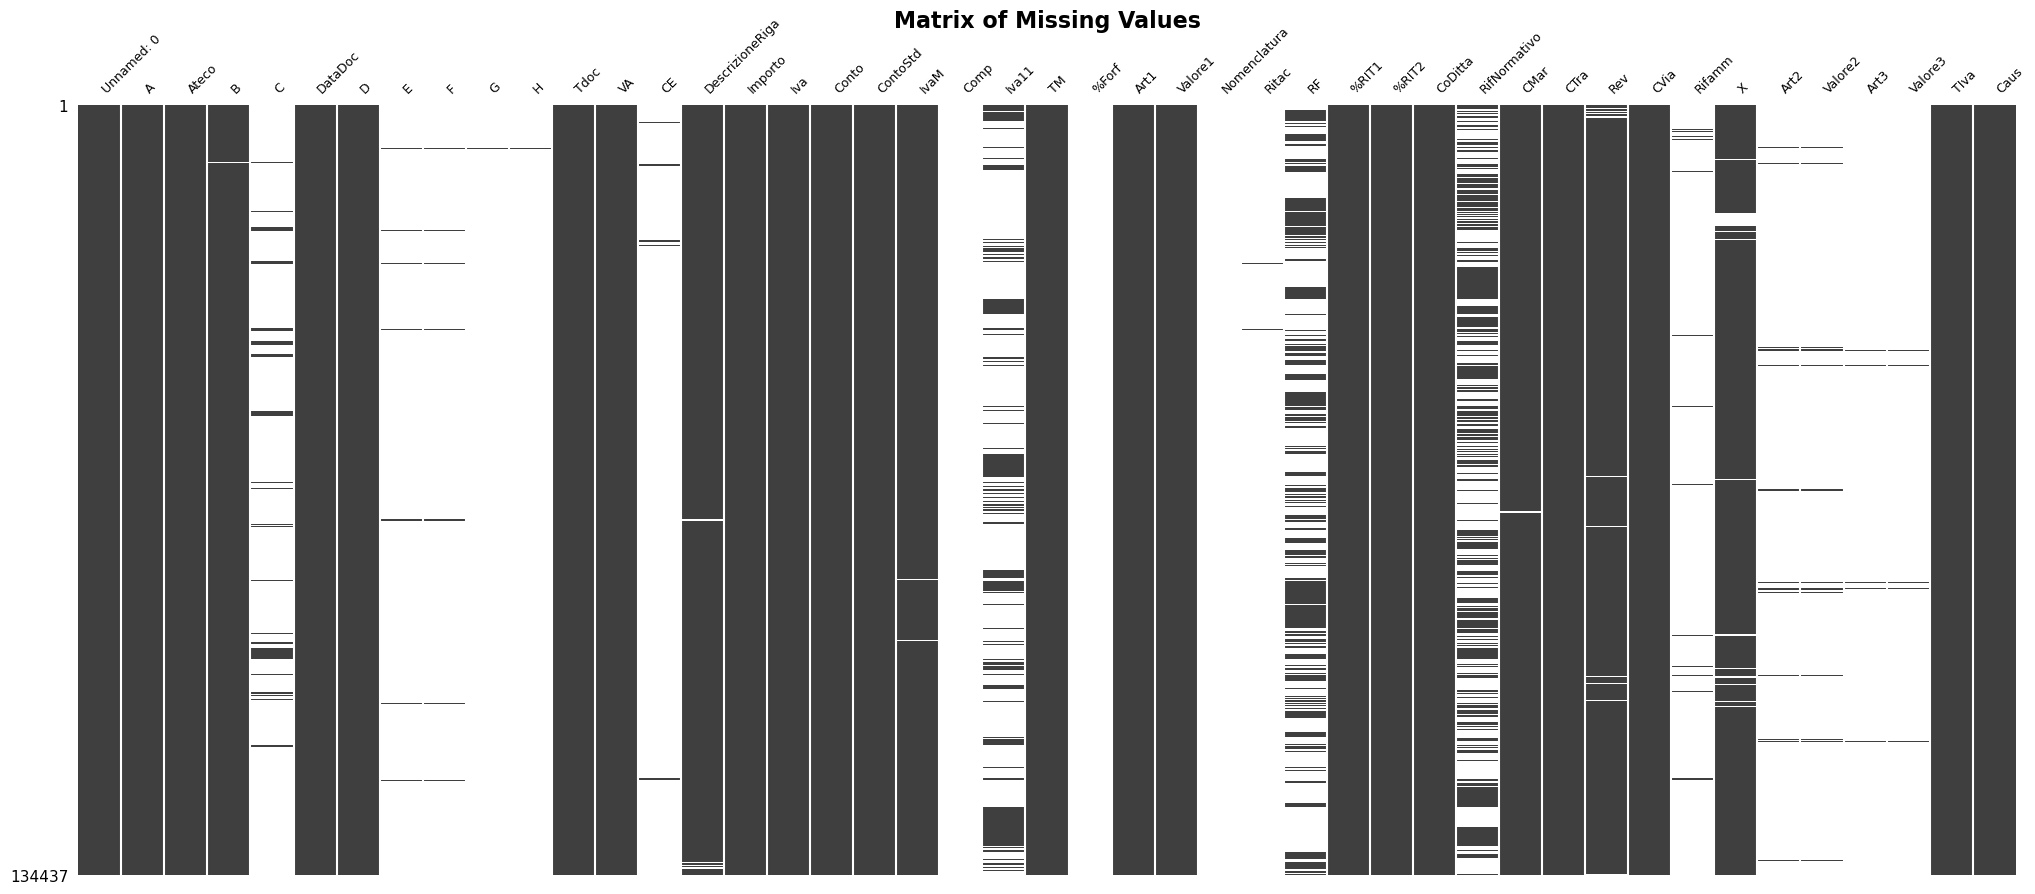

In [7]:
plt.figure(figsize=(10, 8))
msno.matrix(df, sparkline=False, fontsize=9)
plt.title('Matrix of Missing Values', fontsize=16, fontweight='bold', y=1.09)
#plt.savefig('/Users/vincenzocamerlengo/Desktop/Machine Learning/TS LUISS data/grafici/nan.png', dpi=600)
plt.show()

DROP THE COLUMNS THAT HAVE MORE THAN 100.000 NULL VALUES

In [8]:
threshold = len(df) - 100000
df.dropna(axis=1, thresh=threshold, inplace=True)

DELETE THE LESS IMPORTANT VARIABLES 

In [9]:
df.drop(['Unnamed: 0', 'DescrizioneRiga', 'DataDoc', 'RifNormativo', 'Conto', 'ContoStd', 'Art1', 'CoDitta'], axis=1, inplace=True)

In [10]:
df.isnull().sum()

A              0
Ateco          0
B             54
D              1
Tdoc           0
VA             0
Importo        0
Iva            0
IvaM         471
TM             0
Valore1       75
RF         79149
%RIT1          0
%RIT2          0
CMar         403
CTra          84
Rev         1657
CVia           0
X           4465
TIva           0
Caus           0
dtype: int64

FILL NULL VALUES WITH THE MOST FREQUENT CLASS

In [11]:
df['B'].fillna(df['B'].value_counts().index[0], inplace=True)
df['CMar'].replace('N', 0, inplace=True)
df['CMar'].fillna(df['CMar'].value_counts().index[0], inplace=True)
df['CTra'].fillna(df['CTra'].value_counts().index[0], inplace=True)
df['Rev'].fillna(df['Rev'].value_counts().index[0], inplace=True)
df['X'].fillna(df['X'].value_counts().index[0], inplace=True)
df['D'].fillna(df['D'].value_counts().index[0], inplace=True)
df['Valore1'].fillna(df['Valore1'].value_counts().index[0], inplace=True)

FILL NULL VALUES OF THE VARIABLE 'RF' WITH THE CREATION OF A NEW CLASS, CALLED 'ND'

In [12]:
df['RF'].fillna('ND', inplace=True)

In [13]:
df.isnull().sum()

A            0
Ateco        0
B            0
D            0
Tdoc         0
VA           0
Importo      0
Iva          0
IvaM       471
TM           0
Valore1      0
RF           0
%RIT1        0
%RIT2        0
CMar         0
CTra         0
Rev          0
CVia         0
X            0
TIva         0
Caus         0
dtype: int64

DELETE THE 471 ROWS THAT HAVE A NULL VALUE FOR IvaM

In [14]:
df.dropna(inplace=True)

In [15]:
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133966 entries, 0 to 133965
Data columns (total 21 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   A        133966 non-null  object 
 1   Ateco    133966 non-null  int64  
 2   B        133966 non-null  object 
 3   D        133966 non-null  object 
 4   Tdoc     133966 non-null  object 
 5   VA       133966 non-null  object 
 6   Importo  133966 non-null  float64
 7   Iva      133966 non-null  object 
 8   IvaM     133966 non-null  float64
 9   TM       133966 non-null  int64  
 10  Valore1  133966 non-null  object 
 11  RF       133966 non-null  object 
 12  %RIT1    133966 non-null  float64
 13  %RIT2    133966 non-null  float64
 14  CMar     133966 non-null  float64
 15  CTra     133966 non-null  object 
 16  Rev      133966 non-null  object 
 17  CVia     133966 non-null  object 
 18  X        133966 non-null  object 
 19  TIva     133966 non-null  int64  
 20  Caus     133966 non-null  

MAKE OUR VARIABLES SUITABLE FOR THE PREDICTION DOING TWO MAIN OPERATIONS: CLASS REBALANCING AND BINARY ENCODING.

1) MANY VARIABLES WAS STRONGLY UNBALANCED, SO WE CHOSE A THRESHOLD, BELOW WHICH ALL CLASSES WERE GROUPED INTO A NEW CLASS CALLED OTHER. THE DEFINITION OF THIS THRESHOLD IS BASED ON THE DISTRIBUTION OF EACH SPECIFIC VARIABLE. 
2) WHERE POSSIBLE WE IMPLEMENTED A BINARY ENCODING.

WE WILL PROCEED BY TREATING THE VARIABLES IN THE ORDER IN WHICH THEY ARE PRESENT IN OUR DATASET

In [17]:
# Variable 'A' ---> CLASS REBALANCING (threshold=1000)

class_counts = df['A'].value_counts()
print(class_counts)
classes_to_replace = class_counts[class_counts < 1000].index
df['A'] = df['A'].apply(lambda x: 'OTHER' if x in classes_to_replace else x)

A
7    120317
1      6371
6      2899
5      2538
2       909
4       371
3       239
O       116
A        96
S        90
E        16
G         3
N         1
Name: count, dtype: int64


In [18]:
# The ATECO code is divided into sections representing macro-categories of activity. 
# Sections are indicated by the first two digits of the code.

df['Ateco'] = df['Ateco'].astype(str)
df['Ateco'] = df['Ateco'].str.slice(0, 2)

# Variable 'Ateco' ---> CLASS REBALANCING (threshold=1000)

class_counts = df['Ateco'].value_counts()
print(class_counts)
classes_to_replace = class_counts[class_counts < 1000].index
df['Ateco'] = df['Ateco'].apply(lambda x: 'OTHER' if x in classes_to_replace else x)

Ateco
47    37967
43    13702
46    12664
25     5741
14     5048
      ...  
35        8
42        4
53        4
60        2
95        1
Name: count, Length: 65, dtype: int64


In [19]:
# Variable 'B' ---> ORDINAL ENCODING

df['B'].replace('N', 0, inplace=True)
df['B'].replace(['S', 'C', 'X'], 1, inplace=True)

#according to the dataset description provided by the company: 'S', 'C' and 'X' mean YES, and 'N' means NO.

In [20]:
# Variable 'Tdoc' ---> CLASS REBALANCING (threshold=1000)

class_counts = df['Tdoc'].value_counts()
print(class_counts)
classes_to_replace = class_counts[class_counts < 1000].index
df['Tdoc'] = df['Tdoc'].apply(lambda x: 'OTHER' if x in classes_to_replace else x)

Tdoc
TD01    85661
TD24    39463
TD04     7081
TD06      855
TD02      691
TD05       79
TD27       70
TD25       44
TD17       12
TD26        9
TD03        1
Name: count, dtype: int64


In [21]:
# Variable 'VA' ---> ORDINAL ENCODING

df['VA'].replace('V', 0, inplace=True)
df['VA'].replace('A', 1, inplace=True)

#This variable represents the document type: sales (V) or purchases (A)

In [22]:
# Variable 'Iva' ---> CLASS REBALANCING (threshold=1200)

class_counts = df['Iva'].value_counts()
print(class_counts)
classes_to_replace = class_counts[class_counts < 1200].index
df['Iva'] = df['Iva'].apply(lambda x: 'OTHER' if x in classes_to_replace else x)

Iva
N3.5    32657
N2.2    20848
N1      16703
N2      14974
N6.7    13288
N4       9387
N3.1     5464
N2.1     4814
N3.2     4361
N5       3218
N6.1     2775
N6.3     2037
N6.5     1108
N3.4      771
N3.3      520
N6.6      346
N3        264
N6        167
N6.9      127
N7         63
N6.2       33
N3.6       22
N6.4       13
N6.8        6
Name: count, dtype: int64


In [23]:
# Variable 'IvaM' ---> CLASS REBALANCING (threshold=250)

class_counts = df['IvaM'].value_counts()
print(class_counts)
classes_to_replace = class_counts[class_counts < 250].index
df['IvaM'] = df['IvaM'].apply(lambda x: 'OTHER' if x in classes_to_replace else x)
df['IvaM'] = df['IvaM'].astype(str)

#for the dependent variable, the model would struggle to learn how to classify invoices 
#into exemption codes with very few observations. We adopted a significantly lower threshold of 250, 
#in comparison with the independent features, due to the fact that we wanted to keep an high sensitivity in the model. 

IvaM
374.0    22129
324.0    20895
315.0    16589
312.0    11872
381.0    11061
22.0      7237
302.0     6522
310.0     6160
341.0     4426
326.0     4124
300.0     3771
325.0     3410
308.0     2628
317.0     2572
354.0     1960
377.0     1531
358.0     1104
375.0      844
340.0      626
314.0      616
307.0      576
371.0      544
336.0      439
306.0      425
346.0      365
370.0      230
372.0      192
309.0      189
10.0       175
304.0      152
323.0      144
622.0      106
345.0       68
347.0       67
301.0       65
376.0       29
356.0       23
322.0       20
318.0       11
379.0       11
2.0          8
327.0        5
311.0        5
35.0         5
222.0        4
329.0        3
399.0        3
331.0        3
321.0        3
303.0        3
722.0        3
334.0        2
350.0        2
316.0        2
367.0        2
355.0        1
23.0         1
110.0        1
339.0        1
369.0        1
Name: count, dtype: int64


In [24]:
# Variable 'TM' ---> CLASS REBALANCING (threshold=1000)

class_counts = df['TM'].value_counts()
print(class_counts)
classes_to_replace = class_counts[class_counts < 1000].index
df['TM'] = df['TM'].apply(lambda x: 'OTHER' if x in classes_to_replace else x)

TM
3     56343
7     51014
12     7820
4      7490
8      6741
20     2132
18     1642
13      249
14      220
16      145
15      122
19       48
Name: count, dtype: int64


In [25]:
# Variable 'Valore1' ---> CLASS REBALANCING (threshold=1000)

class_counts = df['Valore1'].value_counts()
print(class_counts)
classes_to_replace = class_counts[class_counts < 1000].index
df['Valore1'] = df['Valore1'].apply(lambda x: 'OTHER' if x in classes_to_replace else x)

Valore1
1                 7088
..ES              4356
21                2619
PRODUZIONE        2098
IT001E56656352    1903
                  ... 
8891661869           1
24216986             1
D-RIVIPRAIST         1
8891657220           1
907923674            1
Name: count, Length: 43984, dtype: int64


In [26]:
# Variable 'RF' ---> CLASS REBALANCING (threshold=3000)

class_counts = df['RF'].value_counts()
print(class_counts)
classes_to_replace = class_counts[class_counts < 3000].index
df['RF'] = df['RF'].apply(lambda x: 'Not_Ordinary' if x in classes_to_replace else x)

#RF01 means 'Ordinary Fiscal regime' and all the others code are exceptions. So we merged them in the class 'Not_Ordinary'

RF
ND      79093
RF01    49362
RF07     2504
RF19     1208
RF11     1130
RF17      389
RF18      144
RF14      106
RF04       16
RF02       10
RF16        2
RF15        1
RF05        1
Name: count, dtype: int64


In [27]:
# Variable 'CTra' ---> ORDINAL ENCODING

df['CTra'].replace('N', 0, inplace=True)
df['CTra'].replace('S', 1, inplace=True)

In [28]:
# Variable 'Rev' ---> ORDINAL ENCODING

df['Rev'].replace('N', 0, inplace=True)
df['Rev'].replace('S', 1, inplace=True)

In [29]:
# Variable 'CVia' ---> ORDINAL ENCODING

df['CVia'].replace('N', 0, inplace=True)
df['CVia'].replace('S', 1, inplace=True)

In [30]:
# Variable 'TIva' ---> CLASS REBALANCING (threshold=1000)

df['TIva'] = df['TIva'].astype(str)
class_counts = df['TIva'].value_counts()
print(class_counts)
classes_to_replace = class_counts[class_counts < 1000].index
df['TIva'] = df['TIva'].apply(lambda x: 'OTHER' if x in classes_to_replace else x)

TIva
1     72126
11    50307
12     6089
9      3496
17     1026
2       882
6        16
19       15
21        5
14        2
74        1
4         1
Name: count, dtype: int64


In [31]:
# Variable 'Caus' ---> CLASS REBALANCING (threshold=1000)

df['Caus'] = df['Caus'].astype(str)
class_counts = df['Caus'].value_counts()
print(class_counts)
classes_to_replace = class_counts[class_counts < 1000].index
df['Caus'] = df['Caus'].apply(lambda x: 'OTHER' if x in classes_to_replace else x)

Caus
1      71919
11     48369
12      6015
9       3468
17      1009
2        868
222      806
236      536
244      288
227      181
46       115
44        90
229       49
331       45
35        28
210       25
241       22
6         16
19        15
336       15
233       14
146       14
208       11
322       10
231        9
203        6
21         5
238        4
344        2
327        2
207        2
14         2
262        1
41         1
48         1
4          1
230        1
74         1
Name: count, dtype: int64


ONE HOT ENCODING

In [32]:
df = pd.get_dummies(df, columns=['A', 'Ateco', 'D', 'Tdoc', 'Iva', 'TM', 'Valore1', 'RF', 'X', 'TIva', 'Caus'])
df.replace({True: 1, False: 0}, inplace=True)

In [33]:
df.shape

(133966, 97)

WE IMPLEMENTED CRAMER'S METHOD TO MEASURE THE ASSOCIATION BETWEEN THE RESPONSE VARIABLE AND ANY OTHER CATEGORICAL VARIABLE

In [34]:

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

categorical_variables = [
    'B', 'VA', 'CMar', 'CTra', 'Rev', 'CVia', 'A_1', 'A_5', 'A_6', 'A_7', 'A_OTHER', 
    'Ateco_13', 'Ateco_14', 'Ateco_18', 'Ateco_25', 'Ateco_28', 'Ateco_29', 'Ateco_30', 
    'Ateco_32', 'Ateco_41', 'Ateco_43', 'Ateco_45', 'Ateco_46', 'Ateco_47', 'Ateco_49', 
    'Ateco_55', 'Ateco_56', 'Ateco_59', 'Ateco_63', 'Ateco_68', 'Ateco_69', 'Ateco_71', 
    'Ateco_79', 'Ateco_86', 'Ateco_96', 'Ateco_OTHER', 'D_D', 'D_I', 'D_S', 'Tdoc_OTHER', 
    'Tdoc_TD01', 'Tdoc_TD04', 'Tdoc_TD24', 'Iva_N1', 'Iva_N2', 'Iva_N2.1', 'Iva_N2.2', 
    'Iva_N3.1', 'Iva_N3.2', 'Iva_N3.5', 'Iva_N4', 'Iva_N5', 'Iva_N6.1', 'Iva_N6.3', 'Iva_N6.7', 
    'Iva_OTHER', 'TM_3', 'TM_4', 'TM_7', 'TM_8', 'TM_12', 'TM_18', 'TM_20', 'TM_OTHER', 
    'Valore1_1', 'Valore1_2', 'Valore1_3', 'Valore1_21', 'Valore1_..ES', 'Valore1_Acqua', 
    'Valore1_IT001E56656352', 'Valore1_IT001E57259363', 'Valore1_LEGA', 'Valore1_OTHER', 
    'Valore1_PRODUZIONE', 'RF_ND', 'RF_Not_Ordinary', 'RF_RF01', 'X_B', 'X_N', 'X_S', 
    'TIva_1', 'TIva_11', 'TIva_12', 'TIva_17', 'TIva_9', 'TIva_OTHER', 'Caus_1', 'Caus_11', 
    'Caus_12', 'Caus_17', 'Caus_9', 'Caus_OTHER'
]

cramers_v_results = {}
for var in categorical_variables:
    confusion_matrix = pd.crosstab(df['IvaM'], df[var])
    cramers_v_results[var] = cramers_v(confusion_matrix)

sorted_results = sorted(cramers_v_results.items(), key=lambda x: x[1], reverse=True)

for var, value in sorted_results:
    print(f"{var}: {value}")

A_5: 0.9903566875855613
Ateco_79: 0.9903566875855613
Iva_N3.5: 0.9877788815133217
Valore1_21: 0.9739057968992416
Iva_N1: 0.9713117449818428
Iva_N5: 0.9653591623919686
CVia: 0.9597511500620134
Iva_N4: 0.9490728866511328
Rev: 0.9441654322092804
Iva_N3.2: 0.9350586620654696
Iva_N6.7: 0.9230666391851771
Ateco_43: 0.920226483627163
Iva_N3.1: 0.8821580057304428
TIva_9: 0.8104859759020839
Caus_9: 0.8100676461469448
Iva_N2.2: 0.791619047819022
Caus_12: 0.7866194581368859
TIva_12: 0.781971536923914
Iva_N6.3: 0.7698395587508098
Ateco_47: 0.7441252485802572
Iva_N2: 0.7360611697732571
Ateco_59: 0.7301816323878628
Tdoc_TD04: 0.7241502294796572
VA: 0.7139686274802487
Caus_1: 0.6880607471362276
TIva_1: 0.6866855005235848
CTra: 0.678171503011709
Valore1_IT001E56656352: 0.6734252051706348
TIva_11: 0.6713257070390646
Tdoc_TD24: 0.6588924261308601
Ateco_18: 0.6551150318635311
X_N: 0.6521012156261314
Iva_OTHER: 0.6500741922869542
Caus_11: 0.6497498499886811
TM_12: 0.636171060620961
Iva_N6.1: 0.62956295318

ELIMINATING OR GROUPING LOOSELY ASSOCIATED VARIABLES. SPECIFICALLY, ALL THOSE WITH A VALUE OF LESS THAN 0.25

In [35]:
df['Ateco_OTHER'] = df['Ateco_OTHER'] | df['Ateco_29'] | df['Ateco_55'] | df['Ateco_68'] | df['Ateco_41'] | df['Ateco_63']
df['Valore1_OTHER'] = df['Valore1_OTHER'] | df['Valore1_3'] | df['Valore1_2']
df['TM_OTHER'] = df['TM_OTHER'] | df['TM_8']
df.drop('B', axis=1, inplace=True)
df = df.rename(columns={'D_D': 'D_OTHER'})

WE IMPLEMENTED CRAMER'S METHOD AGAIN WITH THE REMAING VARIABLES

In [36]:
categorical_variables = [
    'VA', 'CMar', 'CTra', 'Rev', 'CVia', 'A_1', 'A_5', 'A_6', 'A_7', 'A_OTHER', 
    'Ateco_13', 'Ateco_14', 'Ateco_18', 'Ateco_25', 'Ateco_28', 'Ateco_30', 
    'Ateco_32', 'Ateco_43', 'Ateco_45', 'Ateco_46', 'Ateco_47', 'Ateco_49', 
    'Ateco_56', 'Ateco_59', 'Ateco_69', 'Ateco_71', 
    'Ateco_79', 'Ateco_86', 'Ateco_96', 'Ateco_OTHER', 'D_OTHER', 'D_I', 'D_S', 'Tdoc_OTHER', 
    'Tdoc_TD01', 'Tdoc_TD04', 'Tdoc_TD24', 'Iva_N1', 'Iva_N2', 'Iva_N2.1', 'Iva_N2.2', 
    'Iva_N3.1', 'Iva_N3.2', 'Iva_N3.5', 'Iva_N4', 'Iva_N5', 'Iva_N6.1', 'Iva_N6.3', 'Iva_N6.7', 
    'Iva_OTHER', 'TM_3', 'TM_4', 'TM_7', 'TM_12', 'TM_18', 'TM_20', 'TM_OTHER', 
    'Valore1_1', 'Valore1_21', 'Valore1_..ES', 'Valore1_Acqua', 
    'Valore1_IT001E56656352', 'Valore1_IT001E57259363', 'Valore1_LEGA', 'Valore1_OTHER', 
    'Valore1_PRODUZIONE', 'RF_ND', 'RF_Not_Ordinary', 'RF_RF01', 'X_B', 'X_N', 'X_S', 
    'TIva_1', 'TIva_11', 'TIva_12', 'TIva_17', 'TIva_9', 'TIva_OTHER', 'Caus_1', 'Caus_11', 
    'Caus_12', 'Caus_17', 'Caus_9', 'Caus_OTHER'
]

cramers_v_results = {}
for var in categorical_variables:
    confusion_matrix = pd.crosstab(df['IvaM'], df[var])
    cramers_v_results[var] = cramers_v(confusion_matrix)

sorted_results = sorted(cramers_v_results.items(), key=lambda x: x[1], reverse=True)

for var, value in sorted_results:
    print(f"{var}: {value}")

A_5: 0.9903566875855613
Ateco_79: 0.9903566875855613
Iva_N3.5: 0.9877788815133217
Valore1_21: 0.9739057968992416
Iva_N1: 0.9713117449818428
Iva_N5: 0.9653591623919686
CVia: 0.9597511500620134
Iva_N4: 0.9490728866511328
Rev: 0.9441654322092804
Iva_N3.2: 0.9350586620654696
Iva_N6.7: 0.9230666391851771
Ateco_43: 0.920226483627163
Iva_N3.1: 0.8821580057304428
TIva_9: 0.8104859759020839
Caus_9: 0.8100676461469448
Iva_N2.2: 0.791619047819022
Caus_12: 0.7866194581368859
TIva_12: 0.781971536923914
Iva_N6.3: 0.7698395587508098
Ateco_47: 0.7441252485802572
Iva_N2: 0.7360611697732571
Ateco_59: 0.7301816323878628
Tdoc_TD04: 0.7241502294796572
VA: 0.7139686274802487
Caus_1: 0.6880607471362276
TIva_1: 0.6866855005235848
CTra: 0.678171503011709
Valore1_IT001E56656352: 0.6734252051706348
TIva_11: 0.6713257070390646
Tdoc_TD24: 0.6588924261308601
Ateco_18: 0.6551150318635311
X_N: 0.6521012156261314
Iva_OTHER: 0.6500741922869542
Caus_11: 0.6497498499886811
TM_12: 0.636171060620961
Iva_N6.1: 0.62956295318

### BENCHMARK

To compare the performance for our models, a logistic regression with only the nature code ('Iva') as independent variable, is implemented

In [38]:
df.columns

Index(['VA', 'Importo', 'IvaM', '%RIT1', '%RIT2', 'CMar', 'CTra', 'Rev',
       'CVia', 'A_1', 'A_5', 'A_6', 'A_7', 'A_OTHER', 'Ateco_13', 'Ateco_14',
       'Ateco_18', 'Ateco_25', 'Ateco_28', 'Ateco_29', 'Ateco_30', 'Ateco_32',
       'Ateco_41', 'Ateco_43', 'Ateco_45', 'Ateco_46', 'Ateco_47', 'Ateco_49',
       'Ateco_55', 'Ateco_56', 'Ateco_59', 'Ateco_63', 'Ateco_68', 'Ateco_69',
       'Ateco_71', 'Ateco_79', 'Ateco_86', 'Ateco_96', 'Ateco_OTHER',
       'D_OTHER', 'D_I', 'D_S', 'Tdoc_OTHER', 'Tdoc_TD01', 'Tdoc_TD04',
       'Tdoc_TD24', 'Iva_N1', 'Iva_N2', 'Iva_N2.1', 'Iva_N2.2', 'Iva_N3.1',
       'Iva_N3.2', 'Iva_N3.5', 'Iva_N4', 'Iva_N5', 'Iva_N6.1', 'Iva_N6.3',
       'Iva_N6.7', 'Iva_OTHER', 'TM_3', 'TM_4', 'TM_7', 'TM_8', 'TM_12',
       'TM_18', 'TM_20', 'TM_OTHER', 'Valore1_1', 'Valore1_2', 'Valore1_3',
       'Valore1_21', 'Valore1_..ES', 'Valore1_Acqua', 'Valore1_IT001E56656352',
       'Valore1_IT001E57259363', 'Valore1_LEGA', 'Valore1_OTHER',
       'Valore1_PRODUZIO

In [39]:
X = df[['Iva_N1', 'Iva_N2', 'Iva_N2.1', 'Iva_N2.2', 'Iva_N3.1',
       'Iva_N3.2', 'Iva_N3.5', 'Iva_N4', 'Iva_N5', 'Iva_N6.1', 'Iva_N6.3',
       'Iva_N6.7', 'Iva_OTHER']].values
y = df['IvaM'].values

rf_classifier = LogisticRegression()
k_fold = KFold(n_splits = 5, shuffle=True, random_state=1908)
cross_val_scores = cross_val_score(rf_classifier, X, y, cv=k_fold)
mean_accuracy = cross_val_scores.mean()
print('Mean Accuracy: ', mean_accuracy)
y_pred = cross_val_predict(rf_classifier, X, y, cv=k_fold)
f1 = f1_score(y, y_pred, average='weighted')
print('F1 Score:', f1)

Mean Accuracy:  0.6775898065128888
F1 Score: 0.5711164023063972


### LOGISTIC REGRESSION MODEL WITH K FOLD

In [272]:
X = df.drop(['IvaM'], axis=1).values
y = df['IvaM'].values
scaler = StandardScaler()
X = scaler.fit_transform(X)

rf_classifier = LogisticRegression()
k_fold = KFold(n_splits = 5, shuffle=True, random_state=1908)
cross_val_scores = cross_val_score(rf_classifier, X, y, cv=k_fold)
mean_accuracy = cross_val_scores.mean()
print('Mean Accuracy: ', mean_accuracy)
y_pred = cross_val_predict(rf_classifier, X, y, cv=k_fold)
f1 = f1_score(y, y_pred, average='weighted')
print('F1 Score:', f1)

Mean Accuracy:  0.9372825959157775
F1 Score: 0.9343624621957971


### RANDOM FOREST MODEL WITH K FOLD

In [35]:
rf_classifier = RandomForestClassifier(random_state=1908)
X = df.drop(['IvaM'], axis=1).values
y = df['IvaM'].values
scaler = StandardScaler()
X = scaler.fit_transform(X)

k_fold = KFold(n_splits=5, shuffle=True, random_state=1908)
cross_val_scores = cross_val_score(rf_classifier, X, y, cv=k_fold)
mean_accuracy = cross_val_scores.mean()
print('Mean Accuracy: ', mean_accuracy)
y_pred = cross_val_predict(rf_classifier, X, y, cv=k_fold)
f1 = f1_score(y, y_pred, average='weighted')
print('F1 Score:', f1)

Mean Accuracy:  0.9652971711293443
F1 Score: 0.9651038852308071


In [338]:
X = df.drop(['IvaM'], axis=1).values
y = df['IvaM'].values
scaler = StandardScaler()
X = scaler.fit_transform(X)

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 80, 120)
    max_depths = [None] + list(range(20, 50))
    max_depth = trial.suggest_categorical('max_depth', max_depths)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
    
    
    rf_classifier = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=1908
    )
    
    k_fold = KFold(n_splits=5, shuffle=True, random_state=1908)
    cross_val_scores = cross_val_score(rf_classifier, X, y, cv=k_fold)
    mean_accuracy = cross_val_scores.mean()
    return mean_accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print('Best trial:')
print(study.best_trial.params)
print('Best Accuracy:', study.best_value)


[I 2024-05-12 12:04:35,982] A new study created in memory with name: no-name-28629eb9-eadc-41ea-a8ad-8b2d3dd0c703
[I 2024-05-12 12:05:13,502] Trial 0 finished with value: 0.9594524013137905 and parameters: {'n_estimators': 86, 'max_depth': 43, 'min_samples_split': 6, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.9594524013137905.
[I 2024-05-12 12:06:03,904] Trial 1 finished with value: 0.9593777560653087 and parameters: {'n_estimators': 114, 'max_depth': 47, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.9594524013137905.
[I 2024-05-12 12:06:45,554] Trial 2 finished with value: 0.9651254789229041 and parameters: {'n_estimators': 85, 'max_depth': 43, 'min_samples_split': 8, 'min_samples_leaf': 1}. Best is trial 2 with value: 0.9651254789229041.
[I 2024-05-12 12:07:29,065] Trial 3 finished with value: 0.954331704839656 and parameters: {'n_estimators': 96, 'max_depth': 22, 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 2 with value: 0.

Best trial:
{'n_estimators': 117, 'max_depth': 27, 'min_samples_split': 3, 'min_samples_leaf': 1}
Best Accuracy: 0.966267564652884


In [339]:
hyperparameters = {'n_estimators': 117, 'max_depth': 27, 'min_samples_split': 3, 'min_samples_leaf': 1}

rf_classifier = RandomForestClassifier(random_state=1908, **hyperparameters)
X = df.drop(['IvaM'], axis=1).values
y = df['IvaM'].values
scaler = StandardScaler()
X = scaler.fit_transform(X)

k_fold = KFold(n_splits=5, shuffle=True, random_state=1908)
cross_val_scores = cross_val_score(rf_classifier, X, y, cv=k_fold)
mean_accuracy = cross_val_scores.mean()
print('Mean Accuracy: ', mean_accuracy)
y_pred = cross_val_predict(rf_classifier, X, y, cv=k_fold)
f1 = f1_score(y, y_pred, average='weighted')
print('F1 Score:', f1)

Mean Accuracy:  0.966267564652884
F1 Score: 0.965914939103063


### DECISION TREE MODEL (ONE TREE) WITH K FOLD

In [340]:
dt_classifier = DecisionTreeClassifier(random_state=1908)
X = df.drop(['IvaM'], axis=1).values
y = df['IvaM'].values
scaler = StandardScaler()
X = scaler.fit_transform(X)


k_fold = KFold(n_splits=5, shuffle=True, random_state=1908)
cross_val_scores = cross_val_score(dt_classifier, X, y, cv=k_fold)
mean_accuracy = cross_val_scores.mean()
print('Mean Accuracy: ', mean_accuracy)
y_pred = cross_val_predict(dt_classifier, X, y, cv=k_fold)
f1 = f1_score(y, y_pred, average='weighted')
print('F1 Score:', f1)

Mean Accuracy:  0.961841062916289
F1 Score: 0.9617331132528782


In [342]:
X = df.drop(['IvaM'], axis=1).values
y = df['IvaM'].values
scaler = StandardScaler()
X = scaler.fit_transform(X)

def objective(trial):
    max_depths = [None] + list(range(20, 50))
    max_depth = trial.suggest_categorical('max_depth', max_depths)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    
    dt_classifier = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        criterion=criterion,
        random_state=1908
    )
    
    k_fold = KFold(n_splits=5, shuffle=True, random_state=1908)
    cross_val_scores = cross_val_score(dt_classifier, X, y, cv=k_fold)
    mean_accuracy = cross_val_scores.mean()
    return mean_accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print('Best trial:')
print(study.best_trial.params)
print('Best Accuracy:', study.best_value)

[I 2024-05-12 13:45:29,143] A new study created in memory with name: no-name-115c82bd-de12-4b09-8678-2bb259ffc22e
[I 2024-05-12 13:45:34,521] Trial 0 finished with value: 0.9550557547792151 and parameters: {'max_depth': None, 'min_samples_split': 7, 'min_samples_leaf': 10, 'criterion': 'gini'}. Best is trial 0 with value: 0.9550557547792151.
[I 2024-05-12 13:45:40,171] Trial 1 finished with value: 0.9579594871505691 and parameters: {'max_depth': 47, 'min_samples_split': 16, 'min_samples_leaf': 5, 'criterion': 'entropy'}. Best is trial 1 with value: 0.9579594871505691.
[I 2024-05-12 13:45:45,308] Trial 2 finished with value: 0.9570637307962976 and parameters: {'max_depth': 49, 'min_samples_split': 2, 'min_samples_leaf': 7, 'criterion': 'entropy'}. Best is trial 1 with value: 0.9579594871505691.
[I 2024-05-12 13:45:51,001] Trial 3 finished with value: 0.9579669481651383 and parameters: {'max_depth': 28, 'min_samples_split': 5, 'min_samples_leaf': 2, 'criterion': 'gini'}. Best is trial 3 

Best trial:
{'max_depth': 42, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'entropy'}
Best Accuracy: 0.9621097881510089


In [343]:
hyperparameters = {'max_depth': 42, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'entropy'}

dt_classifier = DecisionTreeClassifier(random_state=1908, **hyperparameters)
X = df.drop(['IvaM'], axis=1).values
y = df['IvaM'].values
scaler = StandardScaler()
X = scaler.fit_transform(X)


k_fold = KFold(n_splits=5, shuffle=True, random_state=1908)
cross_val_scores = cross_val_score(dt_classifier, X, y, cv=k_fold)
mean_accuracy = cross_val_scores.mean()
print('Mean Accuracy: ', mean_accuracy)
y_pred = cross_val_predict(dt_classifier, X, y, cv=k_fold)
f1 = f1_score(y, y_pred, average='weighted')
print('F1 Score:', f1)

Mean Accuracy:  0.9621097881510089
F1 Score: 0.9620105397238538


### SUPPORT VECTOR MACHINE MODEL WITH K FOLD

In [36]:
svm_classifier = SVC(random_state=1908)
X = df.drop(['IvaM'], axis=1).values
y = df['IvaM'].values
scaler = StandardScaler()
X = scaler.fit_transform(X)

k_fold = KFold(n_splits=5, shuffle=True, random_state=1908)
cross_val_scores = cross_val_score(svm_classifier, X, y, cv=k_fold)
mean_accuracy = cross_val_scores.mean()
print('Mean Accuracy: ', mean_accuracy)
y_pred = cross_val_predict(svm_classifier, X, y, cv=k_fold)
f1 = f1_score(y, y_pred, average='weighted')
print('F1 Score:', f1)

Mean Accuracy:  0.9512115074882012
F1 Score: 0.9503272225910833


HYPERPARAMETERS TUNING IS EXTREMELY COMPUTANIONALLY EXPENSIVE, SO WE DECIDED TO DON'T PERFORM IT SINCE THE METRIS ARE ALREADY GOOD

In [39]:
X = df.drop(['IvaM'], axis=1).values
y = df['IvaM'].values
scaler = StandardScaler()
X = scaler.fit_transform(X)

def objective(trial):
    C_values = [0.001, 0.01, 0.1, 1, 10]
    C = trial.suggest_categorical('C', C_values)
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
    degree = trial.suggest_int('degree', 2, 5)
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])
    
    svc_classifier = SVC(
        C=C,
        kernel=kernel,
        degree=degree,
        gamma=gamma,
        random_state=1908
    )
    
    k_fold = KFold(n_splits=5, shuffle=True, random_state=1908)
    cross_val_scores = cross_val_score(svc_classifier, X, y, cv=k_fold)
    mean_accuracy = cross_val_scores.mean()
    return mean_accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

print('Best trial:')
print(study.best_trial.params)
print('Best Accuracy:', study.best_value)

[I 2024-05-13 22:29:31,347] A new study created in memory with name: no-name-a505927c-2355-4ae3-a6bb-812c333d5f40
[I 2024-05-13 22:42:15,010] Trial 0 finished with value: 0.9545705620570522 and parameters: {'C': 10, 'kernel': 'rbf', 'degree': 4, 'gamma': 'scale'}. Best is trial 0 with value: 0.9545705620570522.


### KNN MODEL WITH K FOLD

In [37]:
knn_classifier = KNeighborsClassifier()
X = df.drop(['IvaM'], axis=1).values
y = df['IvaM'].values
scaler = StandardScaler()
X = scaler.fit_transform(X)

k_fold = KFold(n_splits=5, shuffle=True, random_state=1908)
cross_val_scores = cross_val_score(knn_classifier, X, y, cv=k_fold)
mean_accuracy = cross_val_scores.mean()
print('Mean Accuracy: ', mean_accuracy)
y_pred = cross_val_predict(knn_classifier, X, y, cv=k_fold)
f1 = f1_score(y, y_pred, average='weighted')
print('F1 Score:', f1)

Mean Accuracy:  0.9571756969974585
F1 Score: 0.9568259130145423


In [37]:
X = df.drop(['IvaM'], axis=1).values
y = df['IvaM'].values
scaler = StandardScaler()
X = scaler.fit_transform(X)

def objective(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 2, 15)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    algorithm = trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree'])
    leaf_size = trial.suggest_int('leaf_size', 10, 100)
    
    knn_classifier = KNeighborsClassifier(
        n_neighbors=n_neighbors,
        weights=weights,
        algorithm=algorithm,
        leaf_size=leaf_size
    )
    
    k_fold = KFold(n_splits=5, shuffle=True, random_state=1908)
    cross_val_scores = cross_val_score(knn_classifier, X, y, cv=k_fold)
    mean_accuracy = cross_val_scores.mean()
    return mean_accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

print('Best trial:')
print(study.best_trial.params)
print('Best Accuracy:', study.best_value)

[I 2024-05-13 18:57:41,795] A new study created in memory with name: no-name-ca4fd034-b74c-4a1c-96fe-36165ad37c0e
[I 2024-05-13 19:20:11,592] Trial 0 finished with value: 0.954801975254087 and parameters: {'n_neighbors': 6, 'weights': 'uniform', 'algorithm': 'ball_tree', 'leaf_size': 62}. Best is trial 0 with value: 0.954801975254087.
[I 2024-05-13 19:42:17,508] Trial 1 finished with value: 0.9567054407912998 and parameters: {'n_neighbors': 4, 'weights': 'uniform', 'algorithm': 'ball_tree', 'leaf_size': 79}. Best is trial 1 with value: 0.9567054407912998.
[I 2024-05-13 19:45:59,317] Trial 2 finished with value: 0.9627965263314767 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'algorithm': 'auto', 'leaf_size': 19}. Best is trial 2 with value: 0.9627965263314767.
[I 2024-05-13 19:49:36,185] Trial 3 finished with value: 0.9632369398723268 and parameters: {'n_neighbors': 11, 'weights': 'distance', 'algorithm': 'auto', 'leaf_size': 42}. Best is trial 3 with value: 0.9632369398723

Best trial:
{'n_neighbors': 14, 'weights': 'distance', 'algorithm': 'auto', 'leaf_size': 21}
Best Accuracy: 0.9636251020735521


In [38]:
hyperparameters = {'n_neighbors': 14, 'weights': 'distance', 'algorithm': 'auto', 'leaf_size': 21}

knn_classifier = KNeighborsClassifier(**hyperparameters)
X = df.drop(['IvaM'], axis=1).values
y = df['IvaM'].values
scaler = StandardScaler()
X = scaler.fit_transform(X)

k_fold = KFold(n_splits=5, shuffle=True, random_state=1908)
cross_val_scores = cross_val_score(knn_classifier, X, y, cv=k_fold)
mean_accuracy = cross_val_scores.mean()
print('Mean Accuracy: ', mean_accuracy)
y_pred = cross_val_predict(knn_classifier, X, y, cv=k_fold)
f1 = f1_score(y, y_pred, average='weighted')
print('F1 Score:', f1)

Mean Accuracy:  0.9636251020735521
F1 Score: 0.9633274178052911


### ANN MODEL 

In [66]:
X = df.drop(['IvaM'], axis=1).values 
y = df['IvaM'].values 

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=1908)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

EPOCHS = 50  
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 26  
N_SPLITS = 5  

In [67]:
kfold = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=42)

def create_model():
    model = Sequential()
    model.add(Dense(512, input_shape=(X_train_scaled.shape[1],), activation='relu'))
    model.add(Dense(NB_CLASSES, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

scores = []
f1_scores = []
for train, test in kfold.split(X_train_scaled, y_train_encoded):
    model = create_model()
    history = model.fit(X_train_scaled[train], y_train_encoded[train],
                        batch_size=BATCH_SIZE,
                        epochs=EPOCHS,
                        verbose=VERBOSE,
                        validation_data=(X_train_scaled[test], y_train_encoded[test]))
    scores.append(model.evaluate(X_train_scaled[test], y_train_encoded[test], verbose=0))

Epoch 1/50
670/670 [==============================] - 5s 6ms/step - loss: 0.2952 - accuracy: 0.9199 - val_loss: 0.1835 - val_accuracy: 0.9438
Epoch 2/50
670/670 [==============================] - 2s 3ms/step - loss: 0.1660 - accuracy: 0.9457 - val_loss: 0.1616 - val_accuracy: 0.9481
Epoch 3/50
670/670 [==============================] - 2s 3ms/step - loss: 0.1514 - accuracy: 0.9493 - val_loss: 0.1573 - val_accuracy: 0.9498
Epoch 4/50
670/670 [==============================] - 3s 4ms/step - loss: 0.1445 - accuracy: 0.9500 - val_loss: 0.1520 - val_accuracy: 0.9501
Epoch 5/50
670/670 [==============================] - 2s 4ms/step - loss: 0.1391 - accuracy: 0.9514 - val_loss: 0.1460 - val_accuracy: 0.9500
Epoch 6/50
670/670 [==============================] - 3s 5ms/step - loss: 0.1344 - accuracy: 0.9525 - val_loss: 0.1444 - val_accuracy: 0.9496
Epoch 7/50
670/670 [==============================] - 2s 4ms/step - loss: 0.1303 - accuracy: 0.9530 - val_loss: 0.1461 - val_accuracy: 0.9480
Epoch 

In [68]:
y_pred = model.predict(X_train_scaled[test], verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)
f1 = f1_score(y_train_encoded[test], y_pred_classes, average='weighted')
f1_scores.append(f1)
mean_loss = np.mean([score[0] for score in scores])
mean_accuracy = np.mean([score[1] for score in scores])
mean_f1_score = np.mean(f1_scores)
print(f'Accuracy: {mean_accuracy:.5f}')
print(f'F1 Score: {mean_f1_score:.5f}')
print(f'Mean Loss: {mean_loss:.5f}')

Accuracy: 0.95336
F1 Score: 0.95113
Mean Loss: 0.14931


### USER INTERFACE

In [51]:
df.columns

Index(['VA', 'Importo', 'IvaM', '%RIT1', '%RIT2', 'CMar', 'CTra', 'Rev',
       'CVia', 'A_1', 'A_5', 'A_6', 'A_7', 'A_OTHER', 'Ateco_13', 'Ateco_14',
       'Ateco_18', 'Ateco_25', 'Ateco_28', 'Ateco_29', 'Ateco_30', 'Ateco_32',
       'Ateco_41', 'Ateco_43', 'Ateco_45', 'Ateco_46', 'Ateco_47', 'Ateco_49',
       'Ateco_55', 'Ateco_56', 'Ateco_59', 'Ateco_63', 'Ateco_68', 'Ateco_69',
       'Ateco_71', 'Ateco_79', 'Ateco_86', 'Ateco_96', 'Ateco_OTHER',
       'D_OTHER', 'D_I', 'D_S', 'Tdoc_OTHER', 'Tdoc_TD01', 'Tdoc_TD04',
       'Tdoc_TD24', 'Iva_N1', 'Iva_N2', 'Iva_N2.1', 'Iva_N2.2', 'Iva_N3.1',
       'Iva_N3.2', 'Iva_N3.5', 'Iva_N4', 'Iva_N5', 'Iva_N6.1', 'Iva_N6.3',
       'Iva_N6.7', 'Iva_OTHER', 'TM_3', 'TM_4', 'TM_7', 'TM_8', 'TM_12',
       'TM_18', 'TM_20', 'TM_OTHER', 'Valore1_1', 'Valore1_2', 'Valore1_3',
       'Valore1_21', 'Valore1_..ES', 'Valore1_Acqua', 'Valore1_IT001E56656352',
       'Valore1_IT001E57259363', 'Valore1_LEGA', 'Valore1_OTHER',
       'Valore1_PRODUZIO

In [52]:
df.head()

,VA,Importo,IvaM,%RIT1,%RIT2,CMar,CTra,Rev,CVia,A_1,A_5,A_6,A_7,A_OTHER,Ateco_13,Ateco_14,Ateco_18,Ateco_25,Ateco_28,Ateco_29,Ateco_30,Ateco_32,Ateco_41,Ateco_43,Ateco_45,Ateco_46,Ateco_47,Ateco_49,Ateco_55,Ateco_56,Ateco_59,Ateco_63,Ateco_68,Ateco_69,Ateco_71,Ateco_79,Ateco_86,Ateco_96,Ateco_OTHER,D_OTHER,D_I,D_S,Tdoc_OTHER,Tdoc_TD01,Tdoc_TD04,Tdoc_TD24,Iva_N1,Iva_N2,Iva_N2.1,Iva_N2.2,Iva_N3.1,Iva_N3.2,Iva_N3.5,Iva_N4,Iva_N5,Iva_N6.1,Iva_N6.3,Iva_N6.7,Iva_OTHER,TM_3,TM_4,TM_7,TM_8,TM_12,TM_18,TM_20,TM_OTHER,Valore1_1,Valore1_2,Valore1_3,Valore1_21,Valore1_..ES,Valore1_Acqua,Valore1_IT001E56656352,Valore1_IT001E57259363,Valore1_LEGA,Valore1_OTHER,Valore1_PRODUZIONE,RF_ND,RF_Not_Ordinary,RF_RF01,X_B,X_N,X_S,TIva_1,TIva_11,TIva_12,TIva_17,TIva_9,TIva_OTHER,Caus_1,Caus_11,Caus_12,Caus_17,Caus_9,Caus_OTHER
0,1,3.22,374.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
1,1,6.20,374.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
2,1,21.06,374.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
3,1,9.50,374.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
4,1,11.38,374.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0


In [53]:
hyperparameters = {'n_estimators': 117, 'max_depth': 27, 'min_samples_split': 3, 'min_samples_leaf': 1}

rf_classifier = RandomForestClassifier(random_state=1908, **hyperparameters)
X = df.drop(['IvaM'], axis=1).values
y = df['IvaM'].values
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=27, min_samples_split=3, n_estimators=117,
                       random_state=1908)

In [54]:
# Save the model
save_path = os.path.expanduser("~/rf_classifier.pkl")
joblib.dump(rf_classifier, save_path)

['/Users/vincenzocamerlengo/rf_classifier.pkl']

In [55]:
#List encoded and non encoded variables

encoded_feature_names = [
    'A_1', 'A_5', 'A_6', 'A_7', 'A_OTHER', 'Ateco_13', 'Ateco_14', 'Ateco_18', 'Ateco_25',
    'Ateco_28', 'Ateco_29', 'Ateco_30', 'Ateco_32', 'Ateco_41', 'Ateco_43', 'Ateco_45',
    'Ateco_46', 'Ateco_47', 'Ateco_49', 'Ateco_55', 'Ateco_56', 'Ateco_59', 'Ateco_63',
    'Ateco_68', 'Ateco_69', 'Ateco_71', 'Ateco_79', 'Ateco_86', 'Ateco_96', 'Ateco_OTHER',
    'D_OTHER', 'D_I', 'D_S', 'Tdoc_OTHER', 'Tdoc_TD01', 'Tdoc_TD04', 'Tdoc_TD24', 'Iva_N1',
    'Iva_N2', 'Iva_N2.1', 'Iva_N2.2', 'Iva_N3.1', 'Iva_N3.2', 'Iva_N3.5', 'Iva_N4', 'Iva_N5',
    'Iva_N6.1', 'Iva_N6.3', 'Iva_N6.7', 'Iva_OTHER', 'TM_3', 'TM_4', 'TM_7', 'TM_8', 'TM_12',
    'TM_18', 'TM_20', 'TM_OTHER', 'Valore1_1', 'Valore1_2', 'Valore1_3', 'Valore1_21',
    'Valore1_..ES', 'Valore1_Acqua', 'Valore1_IT001E56656352', 'Valore1_IT001E57259363',
    'Valore1_LEGA', 'Valore1_OTHER', 'Valore1_PRODUZIONE', 'RF_ND', 'RF_Not_Ordinary',
    'RF_RF01', 'X_B', 'X_N', 'X_S', 'TIva_1', 'TIva_11', 'TIva_12', 'TIva_17', 'TIva_9',
    'TIva_OTHER', 'Caus_1', 'Caus_11', 'Caus_12', 'Caus_17', 'Caus_9', 'Caus_OTHER'
]

non_encoded_feature_names = ['VA', 'Importo', '%RIT1', '%RIT2', 'CMar', 'CTra', 'Rev', 'CVia']

In [56]:
#Create a dictionary for encoded variables 
input_mapping = {
    'A': ['1', '5', '6', '7', 'OTHER'],
    'Ateco': ['13', '14', '18', '25', '28', '29', '30', '32', '41', '43', '45', '46', '47', '49', '55', '56', '59', '63', '68', '69', '71', '79', '86', '96', 'OTHER'],
    'D': ['OTHER', 'I', 'S'],
    'Tdoc': ['OTHER', 'TD01', 'TD04', 'TD24'],
    'Iva': ['N1', 'N2', 'N2.1', 'N2.2', 'N3.1', 'N3.2', 'N3.5', 'N4', 'N5', 'N6.1', 'N6.3', 'N6.7', 'OTHER'],
    'TM': ['3', '4', '7', '8', '12', '18', '20', 'OTHER'],
    'Valore1': ['1', '2', '3', '21', '..ES', 'Acqua', 'IT001E56656352', 'IT001E57259363', 'LEGA', 'OTHER', 'PRODUZIONE'],
    'RF': ['ND', 'Not_Ordinary', 'RF01'],
    'X': ['B', 'N', 'S'],
    'TIva': ['1', '11', '12', '17', '9', 'OTHER'],
    'Caus': ['1', '11', '12', '17', '9', 'OTHER']
}

In [57]:
#implement a one hot encoding function for encoded variables
def one_hot_encode(input_data, input_mapping):
    encoded_array = np.zeros(len(encoded_feature_names))
    for key, value in input_data.items():
        if key in input_mapping:
            categories = input_mapping[key]
            for category in categories:
                if value == category:
                    encoded_index = encoded_feature_names.index(f"{key}_{category}")
                    encoded_array[encoded_index] = 1
    return encoded_array

In [58]:
#concatenate encoded and non encoded variables
def prepare_input(user_input, input_mapping, non_encoded_feature_names):
    # One-hot encode the encoded variables
    encoded_input = one_hot_encode(user_input, input_mapping)
    
    # Extract non-encoded variables
    non_encoded_input = np.array([user_input[name] for name in non_encoded_feature_names])
    
    # Concatenate encoded and non-encoded inputs
    full_input = np.concatenate([encoded_input, non_encoded_input])
    return full_input

In [59]:
#Mapping and prediction function
def map_and_predict(A, Ateco, D, Tdoc, Iva, TM, Valore1, RF, X, TIva, Caus, VA, Importo, RIT1, RIT2, CMar, CTra, Rev, CVia):
    user_input = {
        'A': A,
        'Ateco': Ateco,
        'D': D,
        'Tdoc': Tdoc,
        'Iva': Iva,
        'TM': TM,
        'Valore1': Valore1,
        'RF': RF,
        'X': X,
        'TIva': TIva,
        'Caus': Caus,
        'VA': VA,
        'Importo': Importo,
        '%RIT1': RIT1,
        '%RIT2': RIT2,
        'CMar': CMar,
        'CTra': CTra,
        'Rev': Rev,
        'CVia': CVia
    }
    prepared_input = prepare_input(user_input, input_mapping, non_encoded_feature_names)
    prepared_input = prepared_input.reshape(1, -1)
    
    # Use the trained RandomForestClassifier to make a prediction
    prediction = rf_classifier.predict(prepared_input)
    return prediction[0]

In [60]:
with gr.Blocks(theme = gr.themes.Monochrome(
    primary_hue="red",
    secondary_hue=gr.themes.Color(c100="#dbeafe", c200="#bfdbfe", c300="#93c5fd", c400="#60a5fa", c50="#eff6ff", c500="#3b82f6", c600="#2563eb", c700="#1d4ed8", c800="#1e40af", c900="#2a1282", c950="#1d3660"),
    neutral_hue="gray",
).set(
    body_background_fill='*secondary_950',
    body_text_color='*primary_800',
    body_text_size='*text_xxl',
    body_text_weight='800',
    border_color_accent='*neutral_50',
    border_color_primary='*neutral_50',
    button_small_text_size='*text_xxl',
    button_primary_background_fill='*primary_900',
    button_primary_background_fill_hover='*primary_700',
    button_primary_text_color='*neutral_50'
)) as demo:
    gr.Markdown(
    """
    <div>
        <h1 style="text-align: center; color: white; font-size: 40px;">Exemption code Predictor</h1>
        <p style="text-align: left; color: white; font-size: 25px;">Enter data into the specified fields and click predict to have the exemption code:</p>
    </div>
    """)
    with gr.Row():
        box1= gr.Dropdown(label='Business type', choices=['1', '5', '6', '7', 'OTHER'])
        box2= gr.Dropdown(label='First two digits of the Ateco code', choices=['13', '14', '18', '25', '28', '29', '30', '32', '41', '43', '45', '46', '47', '49', '55', '56', '59', '63', '68', '69', '71', '79', '86', '96', 'OTHER'])
        box3= gr.Dropdown(label='Vat exibility of the document', choices=['OTHER', 'I', 'S'])
    with gr.Row():
        box4= gr.Dropdown(label='Document type', choices=['OTHER', 'TD01', 'TD04', 'TD24'])
        box5= gr.Dropdown(label='Iva', choices=['N1', 'N2', 'N2.1', 'N2.2', 'N3.1', 'N3.2', 'N3.5', 'N4', 'N5', 'N6.1', 'N6.3', 'N6.7', 'OTHER'])
        box6= gr.Dropdown(label='TM', choices=['3', '4', '7', '8', '12', '18', '20', 'OTHER'])
        box7= gr.Dropdown(label='Valore1', choices=['1', '2', '3', '21', '..ES', 'Acqua', 'IT001E56656352', 'IT001E57259363', 'LEGA', 'OTHER', 'PRODUZIONE'])
    with gr.Row():
        box8= gr.Dropdown(label='RF', choices=['ND', 'Not_Ordinary', 'RF01'])
        box9= gr.Dropdown(label='X', choices=['B', 'N', 'S'])
        box10= gr.Dropdown(label='TIva', choices=['1', '11', '12', '17', '9', 'OTHER'])
        box11= gr.Dropdown(label='Caus', choices=['1', '11', '12', '17', '9', 'OTHER'])
    with gr.Row():
        box12= gr.Dropdown(label='VA: select 1 if it represents a purchase, else 0', choices=['0', '1'])
        text1= gr.Textbox(label='Importo', placeholder='Digit the import')
        box13= gr.Dropdown(label='%RIT1: select 1 if true, else 0 ', choices=['0', '1'])
    with gr.Row():
        box14= gr.Dropdown(label= '%RIT2: select 1 if true, else 0', choices=['0', '1'])
        box15= gr.Dropdown(label= 'CMar', choices=['0', '1'])
        box16= gr.Dropdown(label= 'CTra', choices=['0', '1'])
    with gr.Row():
        box17= gr.Dropdown(label= 'Rev', choices=['0', '1'])
        box18= gr.Dropdown(label= 'CVia', choices=['0', '1'])
    with gr.Row():
        button = gr.Button(value="Predict")
        button.click(fn=map_and_predict, inputs=[box1, box2, box3, box4, box5, box6, box7, box8, box9, box10, box11, box12, text1, box13, box14, box15, box16, box17, box18], outputs=gr.Textbox(label='Ivam Prediction', placeholder='Prediction will appear here...'))
demo.launch(share=True)


Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://a364fa39071d199794.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


### GRAPHS (1/2)

In [47]:
df = pd.read_excel('/Users/vincenzocamerlengo/Desktop/Machine Learning/TS LUISS data/luiss_data_anonym.xlsx')

##### MATRIX OF MISSING VALUES

<Figure size 1000x800 with 0 Axes>

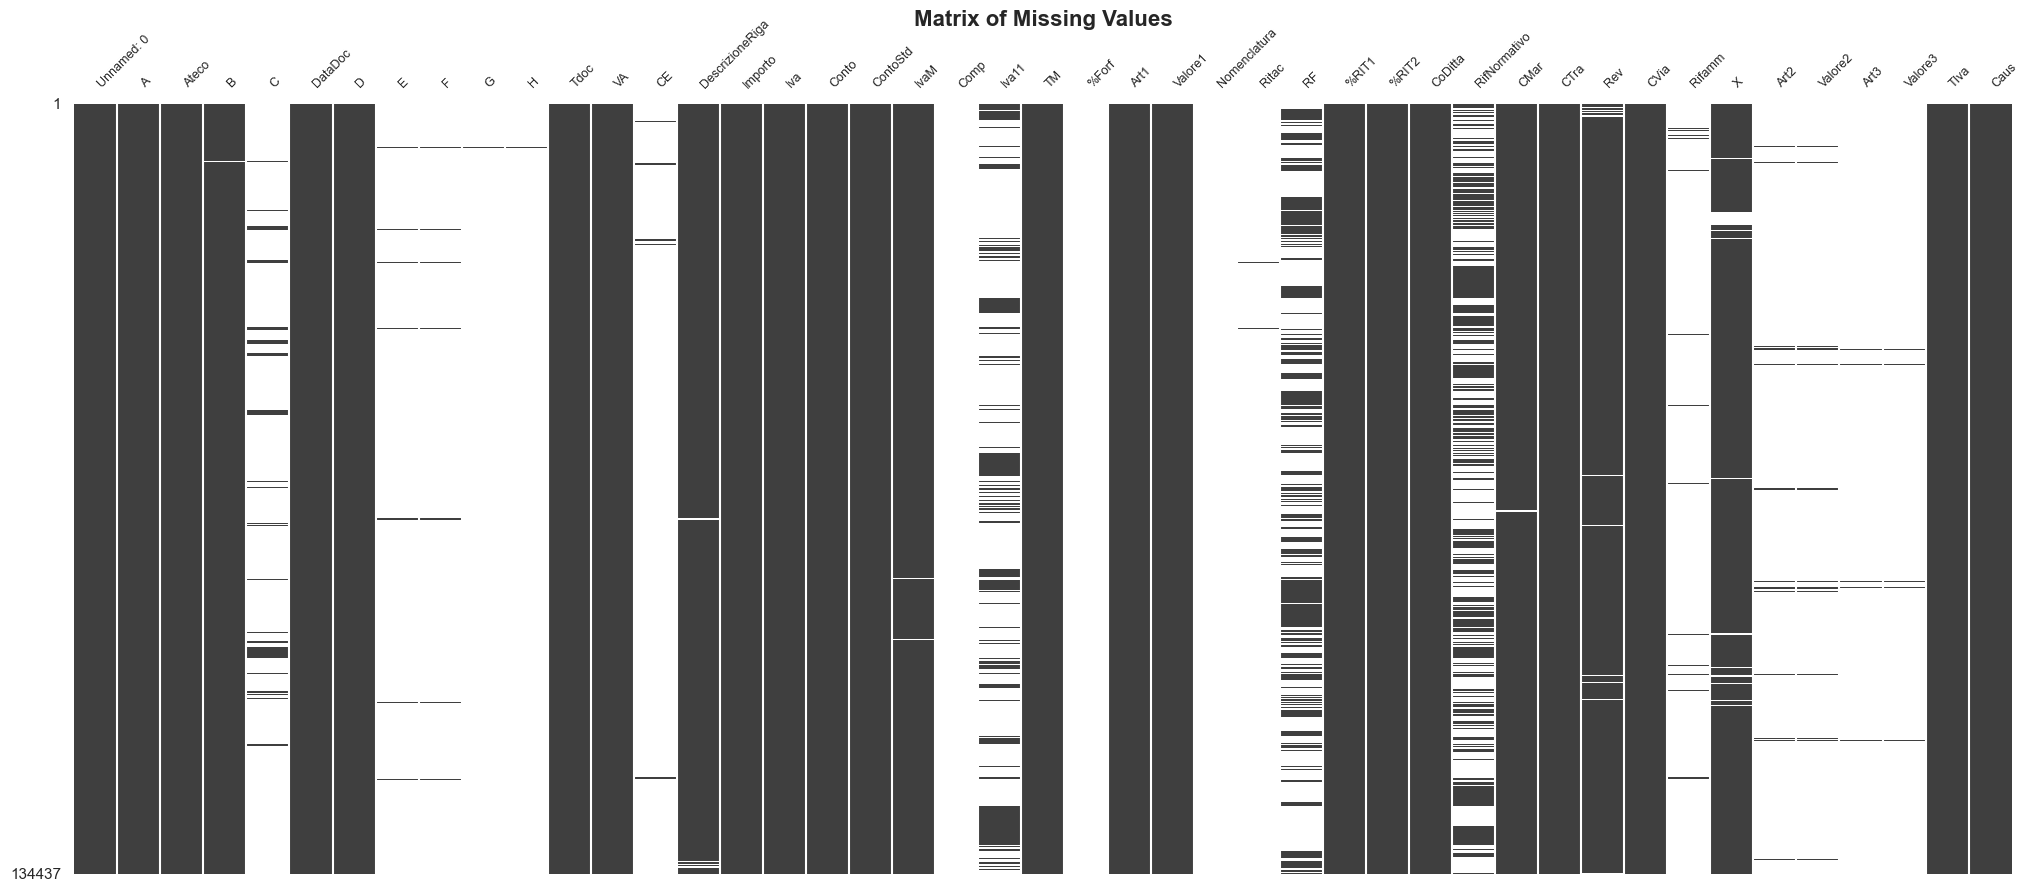

In [39]:
plt.figure(figsize=(10, 8))
msno.matrix(df, sparkline=False, fontsize=9)
plt.title('Matrix of Missing Values', fontsize=16, fontweight='bold', y=1.09)
#plt.savefig('/Users/vincenzocamerlengo/Desktop/Machine Learning/TS LUISS data/grafici/nan.png', dpi=600)
plt.show()

##### EXAMPLE OF HOW CLASS DISTRIBUTIONS CHANGE AFTER REBALANCING

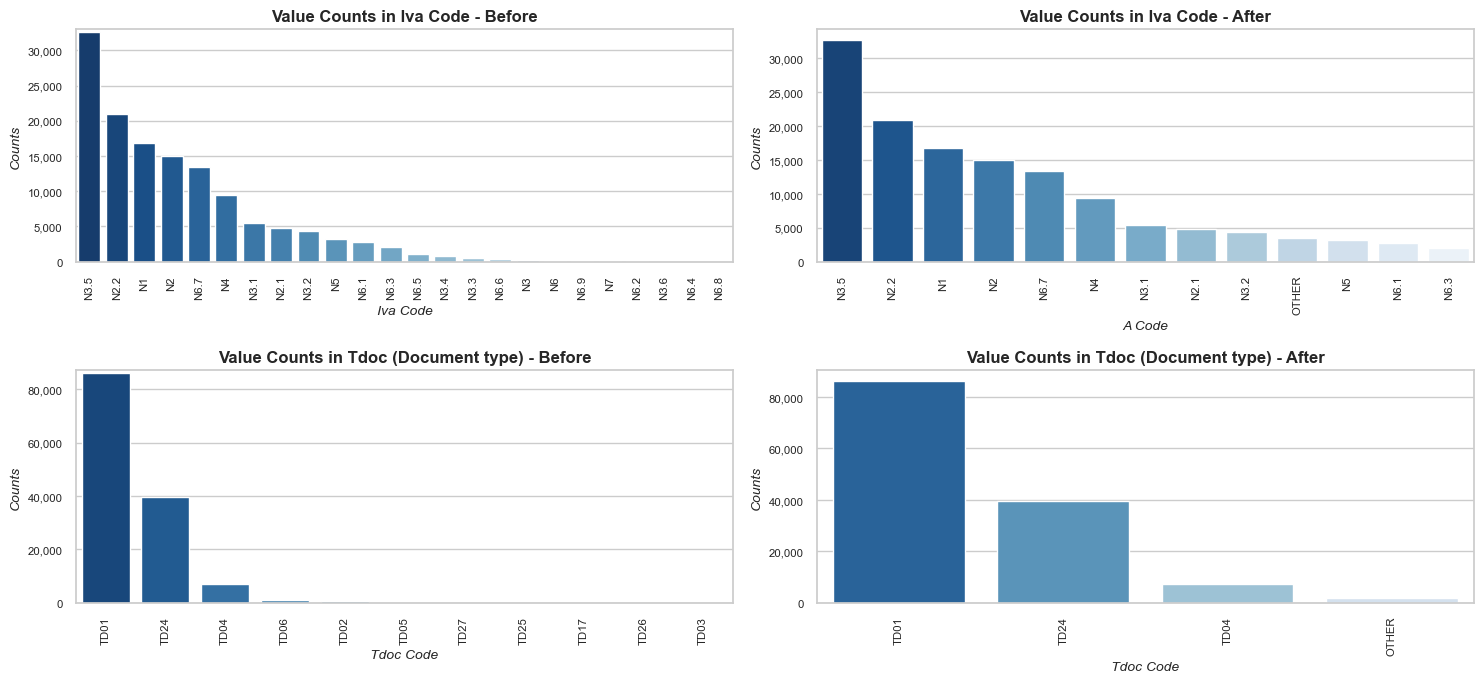

In [40]:
plt.figure(figsize=(15, 7))
plt.subplot(2, 2, 1)
prova = pd.DataFrame()
sns.set(style="whitegrid")
ord = df['Iva'].value_counts().index
ax = sns.countplot(data=df, x='Iva', order=ord, palette='Blues_r')
plt.title('Value Counts in Iva Code - Before', fontweight='bold', fontsize=12)
plt.xlabel('Iva Code', fontsize = 10, fontstyle='italic')
plt.ylabel('Counts', fontsize = 10, fontstyle='italic')
plt.xticks(rotation=90, fontsize=8.2)
plt.yticks(fontsize=8.2)
ax.set_ylim(0, 33000) 
formatter = ticker.StrMethodFormatter("{x:,.0f}") 
ax.yaxis.set_major_formatter(formatter)

plt.subplot(2, 2, 2)

class_counts = df['Iva'].value_counts()
classes_to_replace = class_counts[class_counts < 1200].index
prova['Iva'] = df['Iva'].apply(lambda x: 'OTHER' if x in classes_to_replace else x)

sns.set(style="whitegrid")
ord = prova['Iva'].value_counts().index
ax = sns.countplot(data=prova, x='Iva', order=ord, palette='Blues_r')
plt.title('Value Counts in Iva Code - After', fontweight='bold', fontsize=12)
plt.xlabel('A Code', fontsize=10, fontstyle='italic')
plt.ylabel('Counts', fontsize=10, fontstyle='italic')
plt.xticks(rotation=90, fontsize=8.2)
plt.yticks(fontsize=8.2)
formatter = ticker.StrMethodFormatter("{x:,.0f}") 
ax.yaxis.set_major_formatter(formatter)

plt.subplot(2, 2, 3)

sns.set(style="whitegrid")
ord = df['Tdoc'].value_counts().index
ax = sns.countplot(data=df, x='Tdoc', order=ord, palette='Blues_r')
plt.title('Value Counts in Tdoc (Document type) - Before', fontweight='bold', fontsize=12)
plt.xlabel('Tdoc Code', fontsize = 10, fontstyle='italic')
plt.ylabel('Counts', fontsize = 10, fontstyle='italic')
plt.xticks(rotation=90, fontsize=8.2)
plt.yticks(fontsize=8.2)
ax.set_ylim(0, 87000) 
formatter = ticker.StrMethodFormatter("{x:,.0f}") 
ax.yaxis.set_major_formatter(formatter)

plt.subplot(2, 2, 4)

class_counts = df['Tdoc'].value_counts()
classes_to_replace = class_counts[class_counts < 1000].index
prova['Tdoc'] = df['Tdoc'].apply(lambda x: 'OTHER' if x in classes_to_replace else x)

sns.set(style="whitegrid")
ord = prova['Tdoc'].value_counts().index
ax = sns.countplot(data=prova, x='Tdoc', order=ord, palette='Blues_r')
plt.title('Value Counts in Tdoc (Document type) - After', fontweight='bold', fontsize=12)
plt.xlabel('Tdoc Code', fontsize=10, fontstyle='italic')
plt.ylabel('Counts', fontsize=10, fontstyle='italic')
plt.xticks(rotation=90, fontsize=8.2)
plt.yticks(fontsize=8.2)
formatter = ticker.StrMethodFormatter("{x:,.0f}") 
ax.yaxis.set_major_formatter(formatter)

plt.tight_layout()
#plt.savefig('/Users/vincenzocamerlengo/Desktop/Machine Learning/TS LUISS data/grafici/iva_tdoc.png', dpi=900)
plt.show()

##### HOW CLASS DISTRIBUTIONS CHANGE FOR 'Ateco' AFTER REBALANCING

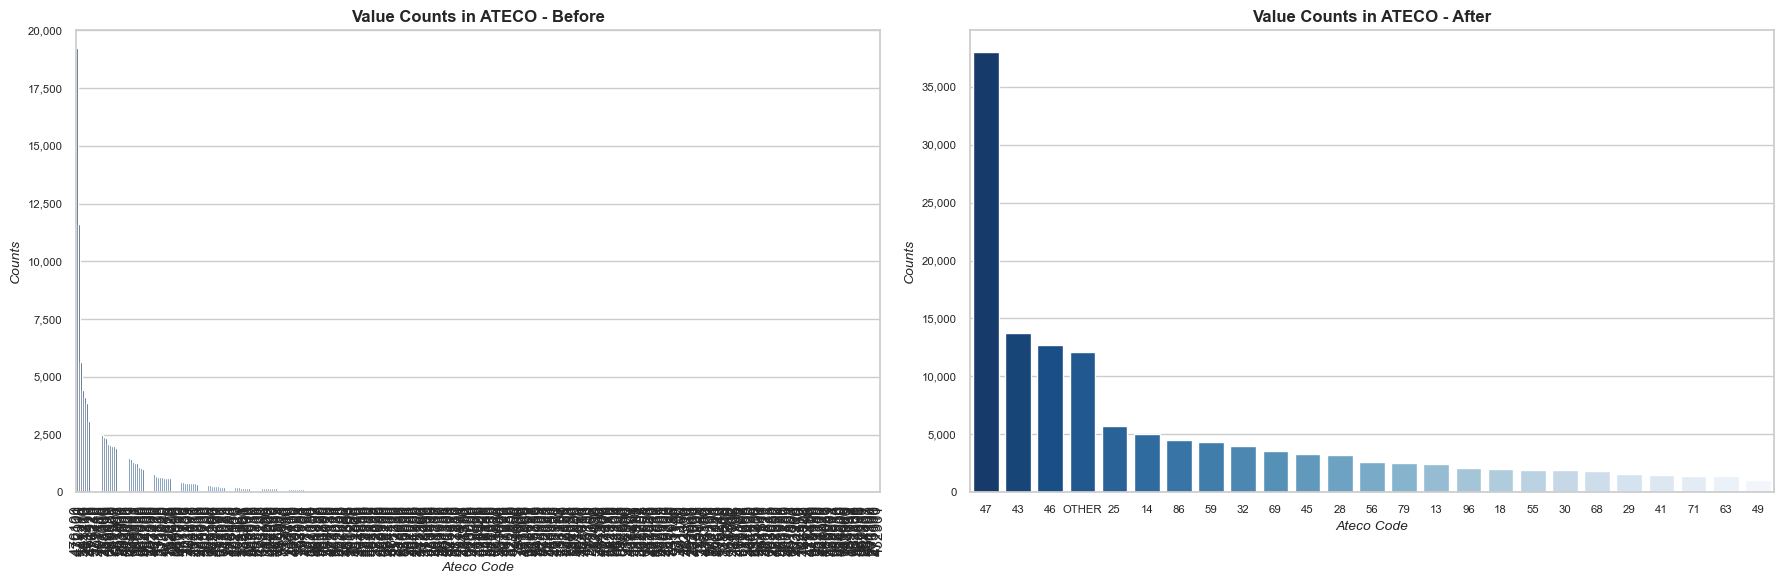

In [41]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)

sns.set(style="whitegrid")
ord = df['Ateco'].value_counts().index
ax = sns.countplot(data=df, x='Ateco', order=ord, palette='Blues_r')
plt.title('Value Counts in ATECO - Before', fontweight='bold', fontsize=12)
plt.xlabel('Ateco Code', fontsize = 10, fontstyle='italic')
plt.ylabel('Counts', fontsize = 10, fontstyle='italic')
plt.xticks(rotation=90)
plt.yticks(fontsize=8.2)
ax.set_ylim(0, 20000) 

formatter = ticker.StrMethodFormatter("{x:,.0f}") 
ax.yaxis.set_major_formatter(formatter)

plt.subplot(1, 2, 2)

prova['Ateco'] = df['Ateco'].astype(str)
prova['Ateco'] = prova['Ateco'].str.slice(0, 2)
class_counts = prova['Ateco'].value_counts()
classes_to_replace = class_counts[class_counts < 1000].index
prova['Ateco'] = prova['Ateco'].apply(lambda x: 'OTHER' if x in classes_to_replace else x)

sns.set(style="whitegrid")
ord = prova['Ateco'].value_counts().index
ax = sns.countplot(data=prova, x='Ateco', order=ord, palette='Blues_r')
plt.title('Value Counts in ATECO - After', fontweight='bold', fontsize=12)
plt.xlabel('Ateco Code', fontsize=10, fontstyle='italic')
plt.ylabel('Counts', fontsize=10, fontstyle='italic')
plt.xticks(rotation=0, fontsize=8.2)
plt.yticks(fontsize=8.2)
formatter = ticker.StrMethodFormatter("{x:,.0f}") 
ax.yaxis.set_major_formatter(formatter)

plt.tight_layout()
#plt.savefig('/Users/vincenzocamerlengo/Desktop/Machine Learning/TS LUISS data/grafici/ateco.png', dpi=900)
plt.show()

##### HOW CLASS DISTRIBUTIONS CHANGE FOR 'Ivam' AFTER REBALANCING

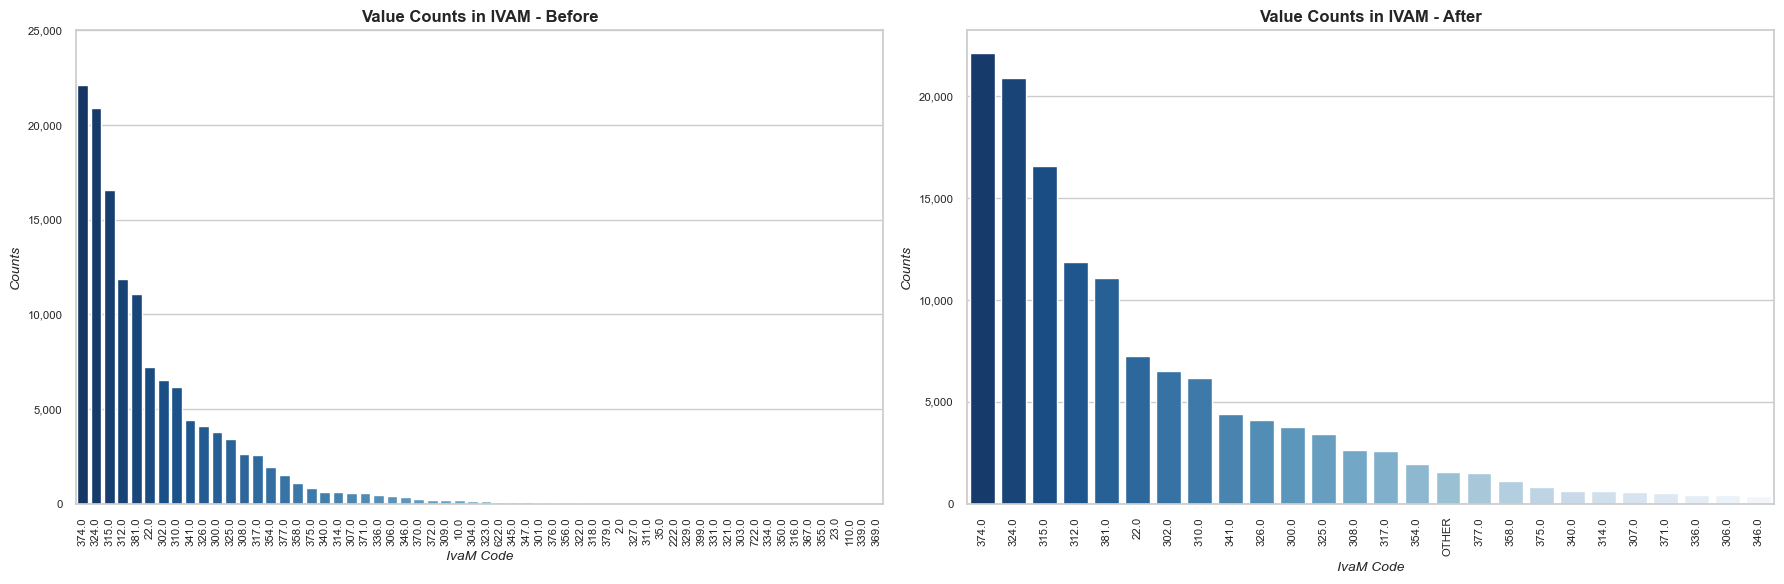

In [103]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)

sns.set(style="whitegrid")
ord = df['IvaM'].value_counts().index
ax = sns.countplot(data=df, x='IvaM', order=ord, palette='Blues_r')
plt.title('Value Counts in IVAM - Before', fontweight='bold', fontsize=12)
plt.xlabel('IvaM Code', fontsize = 10, fontstyle='italic')
plt.ylabel('Counts', fontsize = 10, fontstyle='italic')
plt.xticks(rotation=90, fontsize=8.2)
plt.yticks(fontsize=8.2)
ax.set_ylim(0, 25000) 
formatter = ticker.StrMethodFormatter("{x:,.0f}") 
ax.yaxis.set_major_formatter(formatter)

plt.subplot(1, 2, 2)

class_counts = df['IvaM'].value_counts()
classes_to_replace = class_counts[class_counts < 250].index
prova['IvaM'] = df['IvaM'].apply(lambda x: 'OTHER' if x in classes_to_replace else x)
prova['IvaM'] = prova['IvaM'].astype(str)
prova['IvaM'].replace('nan', np.nan, inplace=True)
prova.dropna(inplace=True)

sns.set(style="whitegrid")
ord = prova['IvaM'].value_counts().index
ax = sns.countplot(data=prova, x='IvaM', order=ord, palette='Blues_r')
plt.title('Value Counts in IVAM - After', fontweight='bold', fontsize=12)
plt.xlabel('IvaM Code', fontsize=10, fontstyle='italic')
plt.ylabel('Counts', fontsize=10, fontstyle='italic')
plt.xticks(rotation=90, fontsize=8.2)
plt.yticks(fontsize=8.2)
formatter = ticker.StrMethodFormatter("{x:,.0f}") 
ax.yaxis.set_major_formatter(formatter)

plt.tight_layout()
#plt.savefig('/Users/vincenzocamerlengo/Desktop/Machine Learning/TS LUISS data/grafici/ivam.png', dpi=900)
plt.show()

### GRAPHS (2/2)

Before the following graphs, is necessary to perform again the data preprocessing

In [48]:
threshold = len(df) - 100000
df.dropna(axis=1, thresh=threshold, inplace=True)
df.drop(['Unnamed: 0', 'DescrizioneRiga', 'DataDoc', 'RifNormativo', 'Conto', 'ContoStd', 'Art1', 'CoDitta'], axis=1, inplace=True)
df['B'].fillna(df['B'].value_counts().index[0], inplace=True)
df['CMar'].replace('N', 0, inplace=True)
df['CMar'].fillna(df['CMar'].value_counts().index[0], inplace=True)
df['CTra'].fillna(df['CTra'].value_counts().index[0], inplace=True)
df['Rev'].fillna(df['Rev'].value_counts().index[0], inplace=True)
df['X'].fillna(df['X'].value_counts().index[0], inplace=True)
df['D'].fillna(df['D'].value_counts().index[0], inplace=True)
df['Valore1'].fillna(df['Valore1'].value_counts().index[0], inplace=True)
df['RF'].fillna('ND', inplace=True)
df.dropna(inplace=True)
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)
class_counts = df['A'].value_counts()
classes_to_replace = class_counts[class_counts < 1000].index
df['A'] = df['A'].apply(lambda x: 'OTHER' if x in classes_to_replace else x)
df['Ateco'] = df['Ateco'].astype(str)
df['Ateco'] = df['Ateco'].str.slice(0, 2)

class_counts = df['Ateco'].value_counts()
classes_to_replace = class_counts[class_counts < 1000].index
df['Ateco'] = df['Ateco'].apply(lambda x: 'OTHER' if x in classes_to_replace else x)
df['B'].replace('N', 0, inplace=True)
df['B'].replace(['S', 'C', 'X'], 1, inplace=True)
class_counts = df['Tdoc'].value_counts()
classes_to_replace = class_counts[class_counts < 1000].index
df['Tdoc'] = df['Tdoc'].apply(lambda x: 'OTHER' if x in classes_to_replace else x)
df['VA'].replace('V', 0, inplace=True)
df['VA'].replace('A', 1, inplace=True)
class_counts = df['Iva'].value_counts()
classes_to_replace = class_counts[class_counts < 1200].index
df['Iva'] = df['Iva'].apply(lambda x: 'OTHER' if x in classes_to_replace else x)
class_counts = df['IvaM'].value_counts()
classes_to_replace = class_counts[class_counts < 250].index
df['IvaM'] = df['IvaM'].apply(lambda x: 'OTHER' if x in classes_to_replace else x)
df['IvaM'] = df['IvaM'].astype(str)
class_counts = df['TM'].value_counts()
classes_to_replace = class_counts[class_counts < 1000].index
df['TM'] = df['TM'].apply(lambda x: 'OTHER' if x in classes_to_replace else x)
class_counts = df['Valore1'].value_counts()
classes_to_replace = class_counts[class_counts < 1000].index
df['Valore1'] = df['Valore1'].apply(lambda x: 'OTHER' if x in classes_to_replace else x)
class_counts = df['RF'].value_counts()
classes_to_replace = class_counts[class_counts < 3000].index
df['RF'] = df['RF'].apply(lambda x: 'Not_Ordinary' if x in classes_to_replace else x)
df['CTra'].replace('N', 0, inplace=True)
df['CTra'].replace('S', 1, inplace=True)
df['Rev'].replace('N', 0, inplace=True)
df['Rev'].replace('S', 1, inplace=True)
df['CVia'].replace('N', 0, inplace=True)
df['CVia'].replace('S', 1, inplace=True)
df['TIva'] = df['TIva'].astype(str)
class_counts = df['TIva'].value_counts()
classes_to_replace = class_counts[class_counts < 1000].index
df['TIva'] = df['TIva'].apply(lambda x: 'OTHER' if x in classes_to_replace else x)
df['Caus'] = df['Caus'].astype(str)
class_counts = df['Caus'].value_counts()
classes_to_replace = class_counts[class_counts < 1000].index
df['Caus'] = df['Caus'].apply(lambda x: 'OTHER' if x in classes_to_replace else x)
df = pd.get_dummies(df, columns=['A', 'Ateco', 'D', 'Tdoc', 'Iva', 'TM', 'Valore1', 'RF', 'X', 'TIva', 'Caus'])
df.replace({True: 1, False: 0}, inplace=True)
df['Ateco_OTHER'] = df['Ateco_OTHER'] | df['Ateco_29'] | df['Ateco_55'] | df['Ateco_68'] | df['Ateco_41'] | df['Ateco_63']
df['Valore1_OTHER'] = df['Valore1_OTHER'] | df['Valore1_3'] | df['Valore1_2']
df['TM_OTHER'] = df['TM_OTHER'] | df['TM_8']
df.drop('B', axis=1, inplace=True)
df = df.rename(columns={'D_D': 'D_OTHER'})

##### CONFUSION MATRIX OF THE VALUE PREDICTED WITH OUR BEST MODEL - LOGISTIC REGRESSION

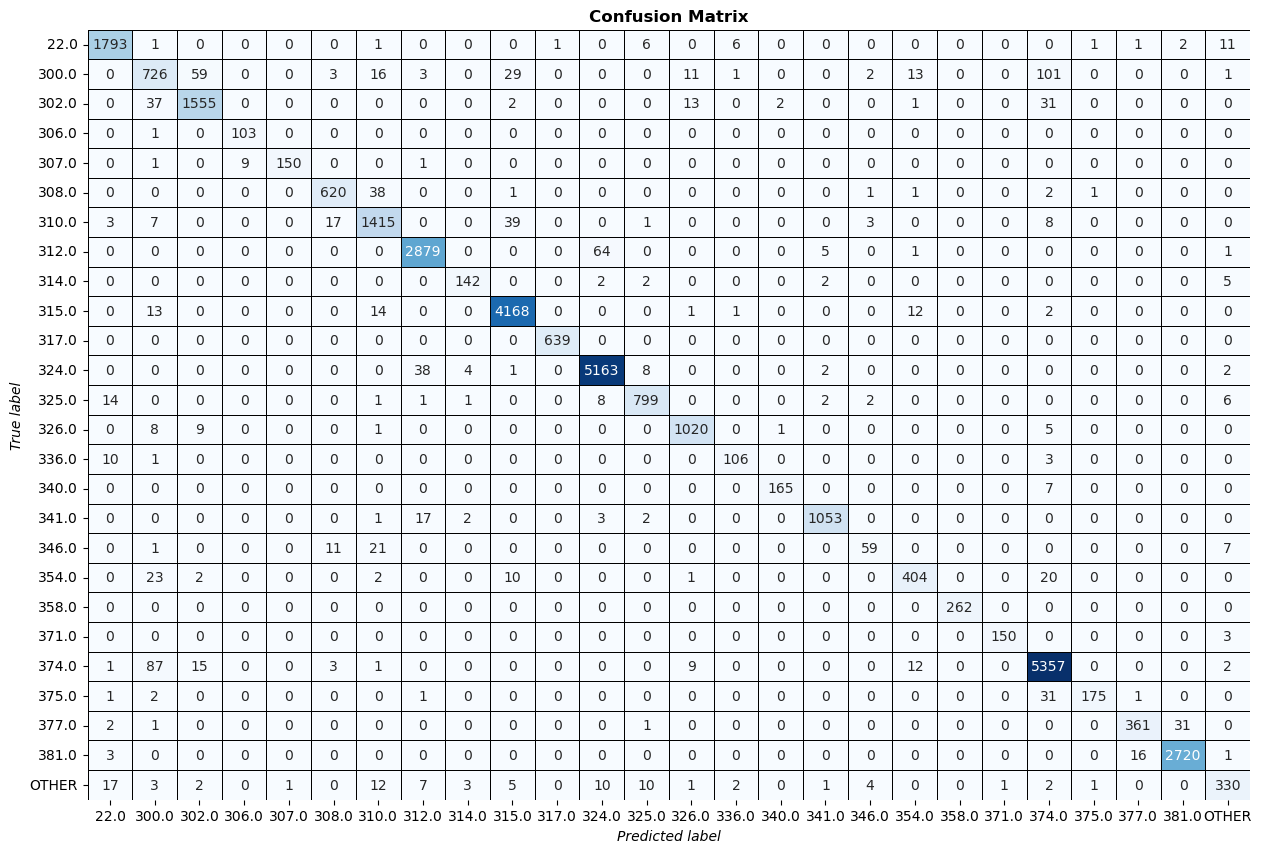

In [118]:
from sklearn.metrics import confusion_matrix

X = df.drop(['IvaM'], axis=1).values
y = df['IvaM'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=69)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


hyperparameters = {'n_estimators': 117, 'max_depth': 27, 'min_samples_split': 3, 'min_samples_leaf': 1}
rf_classifier = RandomForestClassifier(random_state=1908, **hyperparameters)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15, 10))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=np.unique(y_test), yticklabels=np.unique(y_test), linecolor='black', linewidths=0.5)
plt.title('Confusion Matrix', fontweight='bold', fontsize=12)
plt.xlabel('Predicted label', fontsize=10, fontstyle='italic')
plt.ylabel('True label', fontsize=10, fontstyle='italic')
#plt.savefig('/Users/vincenzocamerlengo/Desktop/Machine Learning/TS LUISS data/grafici/conf_mtx.png', dpi=600)
plt.show()

##### Accuracy per Exemption Code

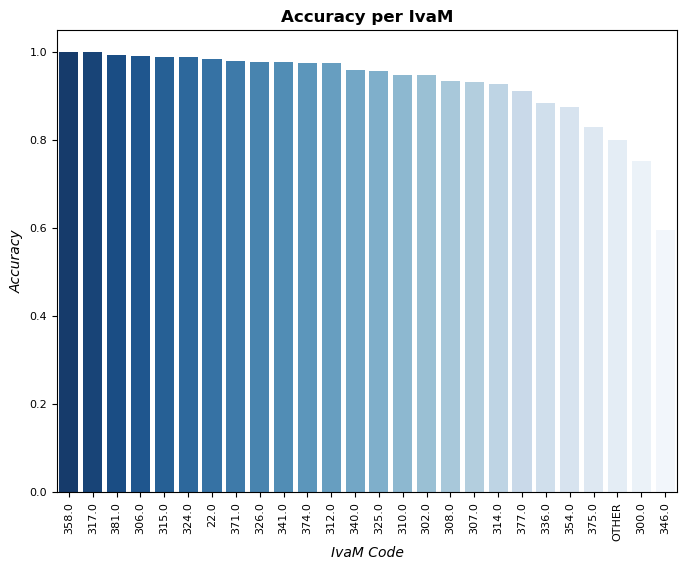

In [122]:
codes = df['IvaM'].unique()
codes.sort()
prova = pd.DataFrame(conf_matrix, columns=codes, index=codes)
acc = pd.DataFrame()
ivam = []
occurrences = []
accuracy = []

for i in prova.columns:
    for j in prova.index:
        if i == j:
            ivam.append(i)
            occurrences.append(prova.loc[j].sum())
            accuracy.append((prova.loc[j, i])/(prova.loc[j].sum()))

acc['IvaM Code'] = ivam
acc['True Values'] = occurrences
acc['Accuracy'] = accuracy
acc.sort_values(by='Accuracy', ascending=False, inplace=True)
acc.reset_index(inplace=True)
acc.drop('index', axis=1, inplace=True)

plt.figure(figsize=(8, 6))
sns.barplot(data=acc, x='IvaM Code', y='Accuracy', palette='Blues_r')
plt.title('Accuracy per IvaM', fontweight='bold', fontsize=12)
plt.xlabel('IvaM Code', fontsize=10, fontstyle='italic')
plt.ylabel('Accuracy', fontsize=10, fontstyle='italic')
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
#plt.savefig('/Users/vincenzocamerlengo/Desktop/Machine Learning/TS LUISS data/grafici/accuracy_ivam.png', dpi=600)
plt.show()

##### MODEL COMPARISON

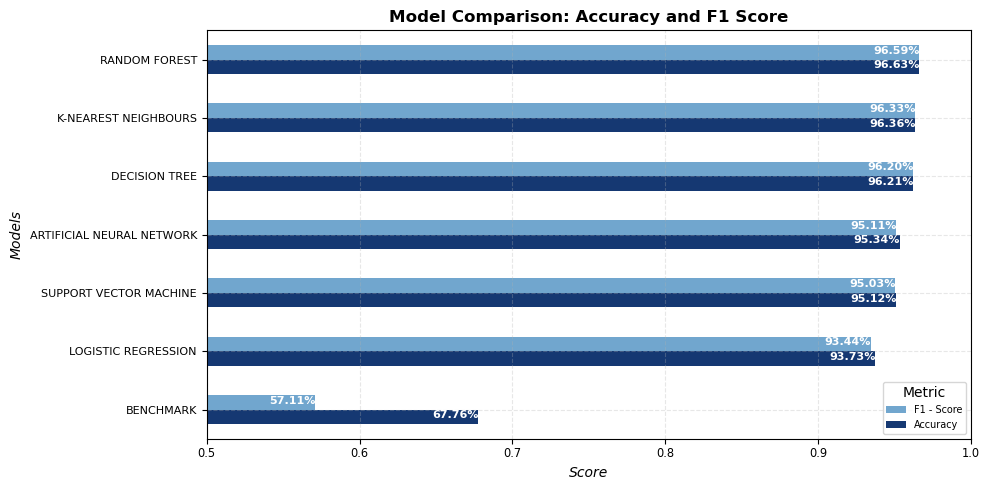

In [44]:
benchmark = [0.6776, 0.5711]
regressione_logistica = [0.9373, 0.9344]
decision_tree = [0.9621, 0.9620]
random_forest = [0.9663, 0.9659]
svm = [0.9512, 0.9503]
knn = [0.9636, 0.9633]
ann = [0.9534, 0.9511]

results = pd.DataFrame({'BENCHMARK': benchmark,
                        'LOGISTIC REGRESSION': regressione_logistica,
                        'SUPPORT VECTOR MACHINE': svm,
                        'ARTIFICIAL NEURAL NETWORK': ann,
                        'DECISION TREE': decision_tree,
                        'K-NEAREST NEIGHBOURS': knn,
                        'RANDOM FOREST': random_forest},
                        index=['Accuracy', 'F1 - Score'])

results = results.T

colors = ['#153872', '#71A6CE']
fig, ax = plt.subplots(figsize=(10, 5))
results.plot(kind='barh', ax=ax, color=colors)
plt.xlabel('Score', fontsize=10, fontstyle='italic')
plt.ylabel('Models', fontsize=10, fontstyle='italic')
plt.title('Model Comparison: Accuracy and F1 Score', fontweight='bold', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), title='Metric', fontsize=7)
plt.yticks(fontsize=8.2)
plt.xticks(fontsize=8.2)
ax.set_xlim(0.5, 1)
ax.tick_params(axis='y', labelsize=8)

for i in ax.patches:
    plt.text(i.get_width() - 0.03, i.get_y() + 0.1, '{:.2%}'.format(i.get_width()), fontsize=8, color='white', fontweight='bold')

plt.tight_layout()
#plt.savefig('/Users/vincenzocamerlengo/Desktop/Machine Learning/TS LUISS data/grafici/model_comparison.png', dpi=600)
plt.show()